# Logistic Regression

## Logistic Regression 모델
> **`Logistic Regression`** 은 **classification**를 위한 **supervised** 머신러닝 모델이다.  
**종속변수가 binominal distribution**을 보일경우 기존 선형모델로는 해결이 어려움이 있음. 이에 기존 선형모델이 풀기 어려운 이진분류 문제를 해결하고자 선형을 비선형으로 변환한 모델이다.  
클래스가 여러개인 분류문제에도 사용이 가능하지만 binary 종속변수 분류문제를 해결하는데 주로 사용.  
ex) 남/여, 개/고양이, OK/NG, 햄메일/스팸메일, 승인/반려

<img src="./image/19.png">

만약 모델(함수)의 출력결과를 0과 1사이로 만들어 줄 수 있다면 즉, 확률 문제로서 접근한다면 분류문제에 사용 가능 하겠다는 아이디어에서 변형 되었다.

## Odds
- 로지스틱회귀 모델을 확률로서 접근하는데 가장 핵심적인 개념  
  
$$ p : 어떤\ 일이\ 발생할\ 확률\ (승산) $$  
$$ Odds = {p \over {1-p}} : \  어떤\ 일이\ 발생할\ 확률\ / 발생하지\ 않을\ 확률\ (승산비)$$  

> 0 < p < 1  
0 < 1-p < 1  
p가 0에 가까울 경우 0  
p가 1에 가까울 경우 무한대  
  
위의 Odds를 그대로 사용하지 않고 log를 취해 사용하면 0을 기준으로 상호대칭적이며, 계산이 수월한 수식이 완성 됩니다.  
기존 선형회귀식에서 y위치에 log Odds를 적용하면 아래와 같은 식이 되고  
  
$$ log({Y \over {1-Y}}) = \beta_0 + \beta_1x$$  
  
이를 다시 y에 대해 정리하면 sigmoid 식이 됩니다.  
  
$$ y = {1 \over {1+\exp^{-(\beta_0 + \beta_1x)}}} $$  

<img src="./image/20.png">

결국 로지스틱 회귀 모델도 $\beta_0$와 $\beta_1$ 를 추정하게 됩니다.
> 0 < sigmoid(x) < 1  
sigmoid(0) = 0.5  
곧 시그모이드 함수를 거친 값을 확률값처럼 생각이 가능해짐

$$ \hat{y} = \begin{cases} 1 & \text{ if } \ h(x) \geq 0.5 \\ 0 & \text{ if } \ h(x) < 0.5 \end{cases} $$

## 모델학습

### cost function

로지스틱 회귀모델의 비용함수는 각 가정에 따른 y의 결과값에 따라 서로 다른 함수를 갖게 됩니다.

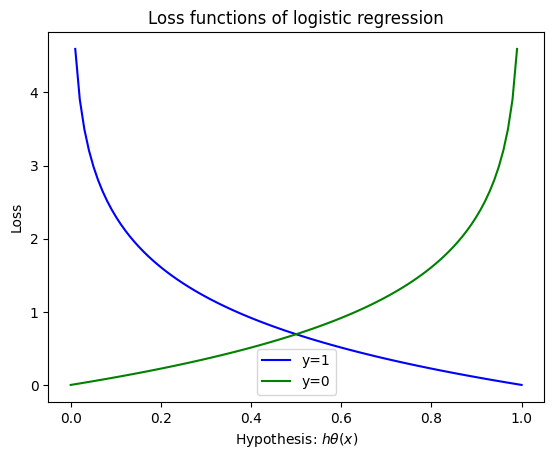

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

x = np.linspace(0, 1, 100)
y1 = 0 - np.log(x)
y0 = 0 - np.log(1 - x)

plt.plot(x, y1, 'b', label='y=1')
plt.plot(x, y0, 'g', label='y=0')
plt.title('Loss functions of logistic regression')
plt.xlabel('Hypothesis: $h\\theta(x)$')
plt.ylabel('Loss')
plt.legend()
plt.show()

이를 방정식으로 풀어내면 하나의 식으로 정리가 됩니다.

$$ cost(h(x),y) = -ylog(h(x)) - (1-y)log(1-h(x)) $$

$$ J(\theta)= \dfrac{1}{N} \sum_{i=1}^N[-y^ilog(h(x^i)) - (1-y^i)log(1-h(x^i))] $$

$$ \dfrac{\partial{J(\theta)}}{\partial \theta_j} = \dfrac{1}{N} \sum_{i=1}^N (h(x^i) - y^i)x_j^i$$

비용함수 편미분 과정 참고 : https://wikidocs.net/4289

## 모델평가
> prediction 모델 **`linear regression`** 은 least squared method를 통해 모델을 평가하였다.  
classification 모델 **`logistic regression`** 은 분류모델 평가 지표를 사용하여 모델을 평가한다.  
대표적인 모델평가 함수인 **confusion matrix(오차행렬)** 와 **classification report(분류평가표)** 를 사용한다.

### confusion matrix(오차행렬)
<img src="./image/21.png" width="600" height="600">  

TP - True Positive(실제값 1, 예측값 1로 정분류 된 갯수)  
FN - False Negative(실제값 1, 예측값 0으로 오분류 된 갯수)  
FP - Flase Positive(실제값 0, 예측값 1로 오분류 된 갯수)  
TN - True Negative(실제값 0, 예측값 0으로 정분류 된 갯수)

### Accuracy(정확도) - 전체 샘플 중 모델이 바르게 분류한 비율
<img src="./image/22.png" width="600" height="600">  

$${TP + TN \over TP + FN + FP + TN}$$

### Precision(정밀도) - 모델이 positive로 분류한 것 중 실제값이 positive이 비율
<img src="./image/23.png" width="600" height="600">  

$${TP \over TP + FP}$$

### Recall(재현율) - 실제값이 positive인 것 중 모델이 positive라 분류한 비율
<img src="./image/24.png" width="600" height="600">  

$${TP \over TP + FN}$$

### f1-score - precision과 recall의 조화평균
<img src="./image/25.png" width="600" height="600">    

$${2 * precision * recall \over precision + recall}$$  

## 로지스틱회귀 실습

In [2]:
# 필요모듈 import
import pandas as pd

# sklearn 유방암 데이터셋 활용
from sklearn.datasets import load_breast_cancer

# 로딩 데이터 확인
print(cancer['DESCR'])

In [3]:
# 데이터 로드
cancer = load_breast_cancer()
print(type(cancer))

<class 'sklearn.utils._bunch.Bunch'>


In [5]:
# 로딩 데이터 확인
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [8]:
cancer['feature_names'], cancer['target_names']

(array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
        'mean smoothness', 'mean compactness', 'mean concavity',
        'mean concave points', 'mean symmetry', 'mean fractal dimension',
        'radius error', 'texture error', 'perimeter error', 'area error',
        'smoothness error', 'compactness error', 'concavity error',
        'concave points error', 'symmetry error',
        'fractal dimension error', 'worst radius', 'worst texture',
        'worst perimeter', 'worst area', 'worst smoothness',
        'worst compactness', 'worst concavity', 'worst concave points',
        'worst symmetry', 'worst fractal dimension'], dtype='<U23'),
 array(['malignant', 'benign'], dtype='<U9'))

In [24]:
# 데이터프레임 제작
X= pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
X1 = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
print(X1)

     mean radius  mean texture  ...  worst symmetry  worst fractal dimension
0          17.99         10.38  ...          0.4601                  0.11890
1          20.57         17.77  ...          0.2750                  0.08902
2          19.69         21.25  ...          0.3613                  0.08758
3          11.42         20.38  ...          0.6638                  0.17300
4          20.29         14.34  ...          0.2364                  0.07678
..           ...           ...  ...             ...                      ...
564        21.56         22.39  ...          0.2060                  0.07115
565        20.13         28.25  ...          0.2572                  0.06637
566        16.60         28.08  ...          0.2218                  0.07820
567        20.60         29.33  ...          0.4087                  0.12400
568         7.76         24.54  ...          0.2871                  0.07039

[569 rows x 30 columns]


In [27]:
# 데이터 분할
y = abs(cancer['target'] - 1)
print(y)

# 훈련과 테스트셋에서의 레이블의 분포가 동일하게 하라. (stratify=label)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 1 0 0 1 

In [14]:
# 모델 import
from sklearn.linear_model import LogisticRegression



In [15]:
# 모델 생성
lr = LogisticRegression()

규제화, 클래스 갯수, 데이터 사이즈에 해당하는 솔버 추천
| solver | penalty | multinominal class | data |
|-|-|-|-|
| 'lbfgs' | 'l2', None  | yes | small |
| 'liblinear' | 'l1', 'l2' | no | small |
| 'newton-cg' | 'l2', None | yes | small |
| 'newton-cholesky' | 'l2', None | no | sample > feature |
| 'sag | 'l2', None | yes | big |
| 'saga' | all | yes | big |

In [16]:
# 모델 훈련
lr.fit(X_train, y_train)

LogisticRegression()

In [29]:
# 모델 예측
lr_pred = lr.predict(X_test)
lr_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1])

In [26]:
# 예측 확률값 확인 -> sigmoid 결과 값으로 0.5 기준으로 0,1 나눌수 있음.
lr.predict_proba(X_test)

array([[6.06169145e-01, 3.93830855e-01],
       [9.76804172e-01, 2.31958280e-02],
       [9.23865756e-01, 7.61342444e-02],
       [9.79596110e-01, 2.04038902e-02],
       [9.86037749e-01, 1.39622512e-02],
       [9.97696751e-01, 2.30324920e-03],
       [2.16670246e-05, 9.99978333e-01],
       [5.82007893e-01, 4.17992107e-01],
       [9.13905395e-01, 8.60946049e-02],
       [9.97374847e-01, 2.62515254e-03],
       [9.73103055e-01, 2.68969448e-02],
       [5.22520183e-09, 9.99999995e-01],
       [9.96369188e-01, 3.63081226e-03],
       [9.83357723e-01, 1.66422765e-02],
       [9.99808241e-01, 1.91758823e-04],
       [8.71211741e-01, 1.28788259e-01],
       [9.96146199e-01, 3.85380073e-03],
       [1.94670980e-07, 9.99999805e-01],
       [0.00000000e+00, 1.00000000e+00],
       [8.47739656e-10, 9.99999999e-01],
       [6.02873307e-12, 1.00000000e+00],
       [6.90391686e-01, 3.09608314e-01],
       [1.06892273e-12, 1.00000000e+00],
       [9.99277223e-01, 7.22777058e-04],
       [9.847110

In [25]:
# 모델 평가
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, lr_pred))
print(classification_report(y_test, lr_pred, target_names=['양성', '악성']))

[[105   2]
 [  9  55]]
              precision    recall  f1-score   support

          양성       0.92      0.98      0.95       107
          악성       0.96      0.86      0.91        64

    accuracy                           0.94       171
   macro avg       0.94      0.92      0.93       171
weighted avg       0.94      0.94      0.93       171



In [30]:
# 
help(recall_score)

Help on function recall_score in module sklearn.metrics._classification:

recall_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')
    Compute the recall.
    
    The recall is the ratio ``tp / (tp + fn)`` where ``tp`` is the number of
    true positives and ``fn`` the number of false negatives. The recall is
    intuitively the ability of the classifier to find all the positive samples.
    
    The best value is 1 and the worst value is 0.
    
    Support beyond term:`binary` targets is achieved by treating :term:`multiclass`
    and :term:`multilabel` data as a collection of binary problems, one for each
    label. For the :term:`binary` case, setting `average='binary'` will return
    recall for `pos_label`. If `average` is not `'binary'`, `pos_label` is ignored
    and recall for both classes are computed then averaged or both returned (when
    `average=None`). Similarly, for :term:`multiclass` and :term:`multilabel` 

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print(precision_score(y_test, lr_pred)) # positive 클래스 기준 출력.

0.9649122807017544


In [ ]:
## 암진단 모델 개선

# random forest 파라미터 서칭 진행.
# test data 기준 9개의 데이터를 최소로 만들어주는 모델을 만드시면 됩니다.
# 4개까지 줄이는 걸 목표로.
'''
[[105   2]
 [  9  55]]
'''

In [37]:
# 필요모듈 import
import pandas as pd

# sklearn 유방암 데이터셋 활용
from sklearn.datasets import load_breast_cancer

# 데이터 로드
cancer = load_breast_cancer()
# print(type(cancer))

# cancer['feature_names'], cancer['target_names']

# 데이터프레임 제작
X= pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
# X1 = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])

# 데이터 분할
y = abs(cancer['target'] - 1)
# print(y)

# 훈련과 테스트셋에서의 레이블의 분포가 동일하게 하라. (stratify=label)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# validation set 생성
X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42, stratify=y_train) 

In [63]:
# 필요모듈 import / parameter searching
from itertools import product
# from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import root_mean_squared_error, r2_score

# product 함수로 파라메터의 모든 조합 만들기
# est = [80, 90, 100, 120, 140, 150, 170]
# depth = [3, 5, 7, 9, 11, 13, 15]
# print(type(est))

# est_center = best_param[0]
# depth_center = best_param[1]

est_center = 100
depth_center = 5
est_step = 1
depth_step = 1
num_items = 5


est = list(range(est_center - (num_items // 2) * est_step, est_center + (num_items // 2) * est_step + 1, est_step))
depth = list(range(depth_center - (num_items // 2) * depth_step, depth_center + (num_items // 2) * depth_step + 1, depth_step))
             

print(est)
print(depth)

# list(product(est, depth)) # 모든 가능한 조합을 만들어줌.

best_score = 99999
best_param = None

for param in list(product(est, depth)):
    print(f'{param} Searching...')
    model = RandomForestClassifier(n_estimators=param[0], max_depth=param[1], random_state=42)
    model.fit(X_train2, y_train2)   # 파라미터 조합을 찾기 위한 검증용 데이터를 제외한 나머지 데이터로 학습.
    pred = model.predict(X_val)    # 검증용 validation set 사용
    rmse = root_mean_squared_error(y_val, pred)

    if rmse < best_score :
        print('Score Updated!')
        best_score = rmse
        best_param = param

print("Search Completed")


# 위 파라메터 조합을 반복문으로 순환하며 파라메터 서칭
print(best_score, best_param)


[98, 99, 100, 101, 102]
[3, 4, 5, 6, 7]
(98, 3) Searching...
Score Updated!
(98, 4) Searching...
Score Updated!
(98, 5) Searching...
(98, 6) Searching...
(98, 7) Searching...
(99, 3) Searching...
(99, 4) Searching...
(99, 5) Searching...
(99, 6) Searching...
(99, 7) Searching...
(100, 3) Searching...
(100, 4) Searching...
(100, 5) Searching...
(100, 6) Searching...
(100, 7) Searching...
(101, 3) Searching...
(101, 4) Searching...
(101, 5) Searching...
(101, 6) Searching...
(101, 7) Searching...
(102, 3) Searching...
(102, 4) Searching...
(102, 5) Searching...
(102, 6) Searching...
(102, 7) Searching...
Search Completed
0.22360679774997896 (98, 4)


In [44]:
center = 140
step = 5
num_items = 10

est = list(range(center - (num_items // 2) * step, center + (num_items // 2) * step + 1, step))

# 결과 확인
print(est)

[115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165]


(np.float64(0.2041241452319315), (140, 9))

In [64]:
# 최적 모델로 모델 다시 학습 및 평가
best_model = RandomForestClassifier(n_estimators=best_param[0], max_depth = best_param[1], random_state=42)
best_model.fit(X_train, y_train)
best_pred = best_model.predict(X_test)

# print(f"r2_score: {r2_score(y_test, best_pred)}")
# print(f"RMSE : {root_mean_squared_error(y_test, best_pred)}")

# 모델 평가
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, best_pred))
print(classification_report(y_test, best_pred, target_names=['양성', '악성']))

[[107   0]
 [  6  58]]
              precision    recall  f1-score   support

          양성       0.95      1.00      0.97       107
          악성       1.00      0.91      0.95        64

    accuracy                           0.96       171
   macro avg       0.97      0.95      0.96       171
weighted avg       0.97      0.96      0.96       171



In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split



# 클래스 가중치 조정
best_model = RandomForestClassifier(
    n_estimators=best_param[0], 
    max_depth=best_param[1], 
    random_state=42,
    class_weight={0: 1, 1: 2}  # 악성(1)에 더 높은 가중치 부여
)
best_model.fit(X_train, y_train)

#  임계값 조정을 위한 예측 확률 계산
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# 다양한 임계값에 대해 성능 평가
thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]
for threshold in thresholds:
    y_pred = (y_pred_proba >= threshold).astype(int)
    
    print(f"\nThreshold: {threshold}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred, target_names=['양성', '악성']))

# 최적의 임계값 선택 (예: 0.4로 가정)
best_threshold = 0.4
final_pred = (y_pred_proba >= best_threshold).astype(int)

print("\nFinal Result:")
print(confusion_matrix(y_test, final_pred))
print(classification_report(y_test, final_pred, target_names=['양성', '악성']))


Threshold: 0.3
[[102   5]
 [  1  63]]
              precision    recall  f1-score   support

          양성       0.99      0.95      0.97       107
          악성       0.93      0.98      0.95        64

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171


Threshold: 0.4
[[106   1]
 [  4  60]]
              precision    recall  f1-score   support

          양성       0.96      0.99      0.98       107
          악성       0.98      0.94      0.96        64

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171


Threshold: 0.5
[[107   0]
 [  4  60]]
              precision    recall  f1-score   support

          양성       0.96      1.00      0.98       107
          악성       1.00      0.94      0.97        64

    accuracy                           0.98       171
   macro av

In [60]:
print(best_score, best_param)

0.2041241452319315 (140, 9)


In [66]:
from itertools import product
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

cancer = load_breast_cancer()

X = cancer['data']
y = abs(cancer['target'] - 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42, stratify=y_train)

lr = LogisticRegression(random_state=42)
dtc = DecisionTreeClassifier(random_state=42)
rfc = RandomForestClassifier(random_state=42)

model_list = [lr, dtc, rfc]

best_score = 0
best_est = None

for est in model_list:
    est.fit(X_train2, y_train2)
    pred = est.predict(X_val)
    recall = recall_score(y_val, pred)
    if recall > best_score:
        best_score = recall
        best_est = est

print(best_est)

est = [100]
depth = [4, 5, 6]

best_param_score = 0
best_param_grid = None

for param in product(est, depth):
    model = RandomForestClassifier(n_estimators=param[0], max_depth=param[1], random_state=42)
    model.fit(X_train2, y_train2)
    pred = model.predict(X_val)
    recall = recall_score(y_val, pred)
    if recall > best_param_score:
        best_param_score = recall
        best_param_grid = param

best_model = RandomForestClassifier(n_estimators=best_param_grid[0], 
                                    max_depth=best_param_grid[1], 
                                    random_state=42)
best_model.fit(X_train, y_train)
best_pred = best_model.predict(X_test)

print(confusion_matrix(y_test, best_pred))

DecisionTreeClassifier(random_state=42)
[[107   0]
 [  5  59]]
